# *Linking Modes of Transport with Household Types*

*Dixon Mai*
(*Dixerino*)

## Background

Inspired by interest in city-building games

Importance of transitioning from low-density to high-density

The aim of this analysis is to:
- Draw links between Household types with the transport needs
- Visualise the data for easier comparison

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

## Preparing the Data

The preparation required for these datasets was:
- Generating a list of Local Government Areas(LGAs) which are common within both sets
- Standardise the data values between the sets using a fold function

In [13]:
filepath = "Data_by_LGA_v2.xlsx"
transport_mode = pd.read_excel(filepath, sheet_name = 'LGA by Mode')
transport_mode.head()

,WAVE,REGION_ID,REGION_NAME,LGA_ID,LGA_NAME,MODE_LABEL,WEIGHTED_TRIPS,PCT_OF_LGA_WEIGHTED_TRIPS,WEIGHTED_TOTAL_DISTANCE,PCT_OF_LGA_WGTD_TOTAL_DISTANCE,WEIGHTED_TRIPS_AVG_DISTANCE
0,2017/18,1,Sydney,500,Bayside,Vehicle Passenger,106121,19,631228,16,5.9
1,2017/18,1,Sydney,500,Bayside,Vehicle Driver,243892,44,2229365,57,9.1
2,2017/18,1,Sydney,500,Bayside,Train,68025,12,739931,19,10.9
3,2017/18,1,Sydney,500,Bayside,Other,7465,1,27695,1,3.7
4,2017/18,1,Sydney,500,Bayside,Bus,32202,6,200567,5,6.2


In [6]:
filepath = 'nsw state and local government area household and implied dwelling projections 2016 2017 09.xlsx'
household_proj = pd.read_excel(filepath, sheet_name = 'LGA Household type', skiprows=11, index_col=False)
household_proj.head()

,Sydney Metropolitan LGAs,Counting,Household Type,2011,2016,2021,2026,2031,2036
0,Blacktown (C),Households,Couple only,19400.0,22500.0,25350.0,28800.0,31950.0,35700.0
1,Blacktown (C),Households,Couple with children,47050.0,52450.0,57950.0,64100.0,69400.0,74850.0
2,Blacktown (C),Households,Single parent,15150.0,17250.0,19500.0,22200.0,24750.0,27450.0
3,Blacktown (C),Households,Other family households,1800.0,2000.0,2150.0,2400.0,2650.0,2900.0
4,Blacktown (C),Households,Multiple-family households,2800.0,3150.0,3550.0,3950.0,4350.0,4750.0


In [7]:
##Separation into 2016/17 and 2017/18 time periods
L1 = ["2016/17" in x for x in transport_mode['WAVE']]
Mode_2016 = transport_mode[L1]
L2 = ["2017/18" in x for x in transport_mode['WAVE']]
Mode_2017 = transport_mode[L2]


In [175]:
##Create list of LGA Names
ModeLGA_list = []
i=0
ModeLGA_name = transport_mode['LGA_NAME']
for i in range(len(transport_mode.index)-1):
    if ModeLGA_name[i] != ModeLGA_name[i+1]: #account for repetitive names
        ModeLGA_list.append(ModeLGA_name[i])

HouseLGA_list = []
i=0
HouseLGA_name = household_proj['Sydney Metropolitan LGAs']
for i in range(len(household_proj.index)-1):
    if HouseLGA_name[i] != HouseLGA_name[i+1]:
        s = str(HouseLGA_name[i])[:-4] #Removes the ending (A) or (C) from data set
        HouseLGA_list.append(s)

##Combines all common elements from both list into a definitive list of LGA names
LGA_list = list(set(ModeLGA_list).intersection(HouseLGA_list))
LGA_list.sort()

In [176]:
LGA_list

['Blacktown',
 'Blue Mountains',
 'Botany Bay',
 'Burwood',
 'Camden',
 'Campbelltown',
 'Canada Bay',
 'Canterbury-Bankstown',
 'Central Coast',
 'Cessnock',
 'Cumberland',
 'Dungog',
 'Fairfield',
 'Georges River',
 'Hawkesbury',
 'Hornsby',
 'Hunters Hill',
 'Inner West',
 'Kiama',
 'Ku-ring-gai',
 'Lake Macquarie',
 'Lane Cove',
 'Liverpool',
 'Maitland',
 'Mosman',
 'Newcastle',
 'North Sydney',
 'Northern Beaches',
 'Parramatta',
 'Penrith',
 'Port Stephens',
 'Randwick',
 'Rockdale',
 'Ryde',
 'Shellharbour',
 'Shoalhaven',
 'Strathfield',
 'Sutherland Shire',
 'Sydney',
 'The Hills Shire',
 'Waverley',
 'Willoughby',
 'Wingecarribee',
 'Wollondilly',
 'Wollongong',
 'Woollahra']

In [165]:
##Create fold function for inputs using household dataset
def fold(given):
    """Return canonical versions of inputs."""

    # dictionary of input:output pairs
    folds = {
        'Blacktown' : 'Blacktown (C)',
 'Blue Mountains' : 'Blue Mountains (C)',
 'Botany Bay': 'Botany Bay (C)',
 'Burwood' : 'Burwood (A)',
 'Camden' : 'Camden (A)',
 'Campbelltown' : 'Campbelltown (C)',
 'Canada Bay' : 'Canada Bay (A)',
 'Canterbury-Bankstown' : 'Canterbury-Bankstown (A)',
 'Central Coast' : 'Central Coast (C)',
 'Cessnock' : 'Cessnock (C)',
 'Cumberland' : 'Cumberland (A)',
 'Dungog' : 'Dungog (A)',
 'Fairfield' : 'Fairfield (C)',
 'Georges River' : 'Georges River (A)',
 'Hawkesbury': 'Hawkesbury (C)',
 'Hornsby' : 'Hornsby (A)',
 'Hunters Hill' : 'Hunters Hill (A)',
 'Inner West' : 'Inner West (A)',
 'Kiama' : 'Kiama (A)',
 'Ku-ring-gai' : 'Ku-ring-gai (A)',
 'Lake Macquarie' : 'Lake Macquarie (C)',
 'Lane Cove' : 'Lane Cove (A)',
 'Liverpool' : 'Liverpool (C)',
 'Maitland' : 'Maitland (C)',
 'Mosman' : 'Mosman (A)',
 'Newcastle' : 'Newcastle (C)',
 'North Sydney' : 'North Sydney (A)',
 'Northern Beaches' : 'Northern Beaches (A)',
 'Parramatta' : 'Parramatta (C)',
 'Penrith' : 'Penrith (C)',
 'Port Stephens' : 'Port Stephens (A)',
 'Randwick' : 'Randwick (C)',
 'Rockdale' : 'Rockdale (C)',
 'Ryde' : 'Ryde (C)',
 'Shellharbour' : 'Shellharbour (C)',
 'Shoalhaven' : 'Shoalhaven (C)',
 'Strathfield' : 'Strathfield (A)',
 'Sutherland Shire' : 'Sutherland Shire (A)',
 'Sydney' : 'Sydney (C)',
 'The Hills Shire' : 'The Hills Shire (A)',
 'Waverley' : 'Waverley (A)',
 'Willoughby' : 'Willoughby (C)',
 'Wingecarribee' : 'Wingecarribee (A)',
 'Wollondilly' : 'Wollondilly (A)',
 'Wollongong' : 'Wollongong (C)',
 'Woollahra' : 'Woollahra (A)'
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

# Visualising the Data

The initial step in grabbing data from the dataframes and generating relevant graphs.

This was utilised to compare the Modes of Transport and the Types of Households qualitatively to gain a general insight on their relation.

In [166]:
tfont = {'fontname':'Verdana'}
c1 = ('#CEEEE4', '#DF9BD3', '#F1B388', '#EAC3EC', '#8CD6F4', '#BBBEC6')
def Mode_Proportion_Pie(LGA_name):
    '''Generates a pie graph on the proportion of Mode of Transport used in an LGA'''
    if LGA_name in LGA_list: #Checks if there is data on the LGA from both
        L = [LGA_name in x for x in Mode_2016['LGA_NAME']] 
        LGA_data = Mode_2016[L] #locates the LGA in the dataset
        Mode_type = LGA_data['MODE_LABEL'] #grabs data of the mode of transport type
        Mode_perc = LGA_data['PCT_OF_LGA_WEIGHTED_TRIPS'] #grabs data of its percentage in the LGA
        #Pie chart
        fig1, ax1 = plt.subplots(figsize=(6, 6))
        ax1.pie(Mode_perc, explode=None, labels=Mode_type, autopct='%1.1f%%',
            wedgeprops=dict(width=0.55), startangle=45, colors = c1)
        ax1.set(aspect="equal", title='2016 \n Percentage of Modes of Transport in ' + LGA_name)
        plt.show()
    else:
        print('No data or not enough data found on ' + LGA_name)

In [167]:
def Household_Dist_Bar(LGA_name):
    '''Generates a Bar chart detailing the amount of Households in each Household type in a LGA'''
    if LGA_name in LGA_list:
        household_proj2 = household_proj.set_index('Sydney Metropolitan LGAs') #set index as LGA so the name can be located
        LGA_data2 = household_proj2.loc[fold(LGA_name)] #converts to the value used in the data set
        n = [0, 1, 2, 3, 4, 6, 7] #ignore the totals in the data
        House_Type = LGA_data2['Household Type'][n] 
        House_Val = LGA_data2[2016][n]
    
        #plot the bar graph
        plt.bar(House_Type, House_Val, width = 0.5, color=('#8CD6F4'))
        plt.title('2016 \n Distribution of Household Types in ' + LGA_name, tfont, fontsize=24)
        plt.xlabel('Types of Households', tfont, fontsize=18)
        plt.ylabel('Number of Households', tfont, fontsize=18)
        
        plt.show()
    else:
        print('No data or not enough data found on ' + LGA_name)

def LGA_Comparison(LGA_name):
    Mode_Proportion_Pie(LGA_name)
    Household_Dist_Bar(LGA_name)

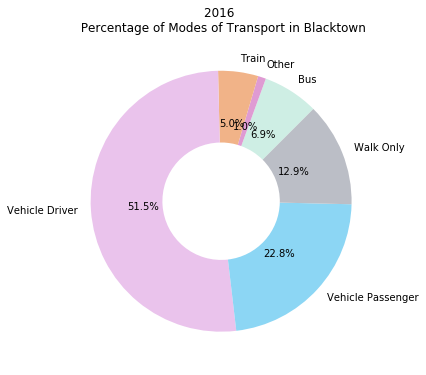

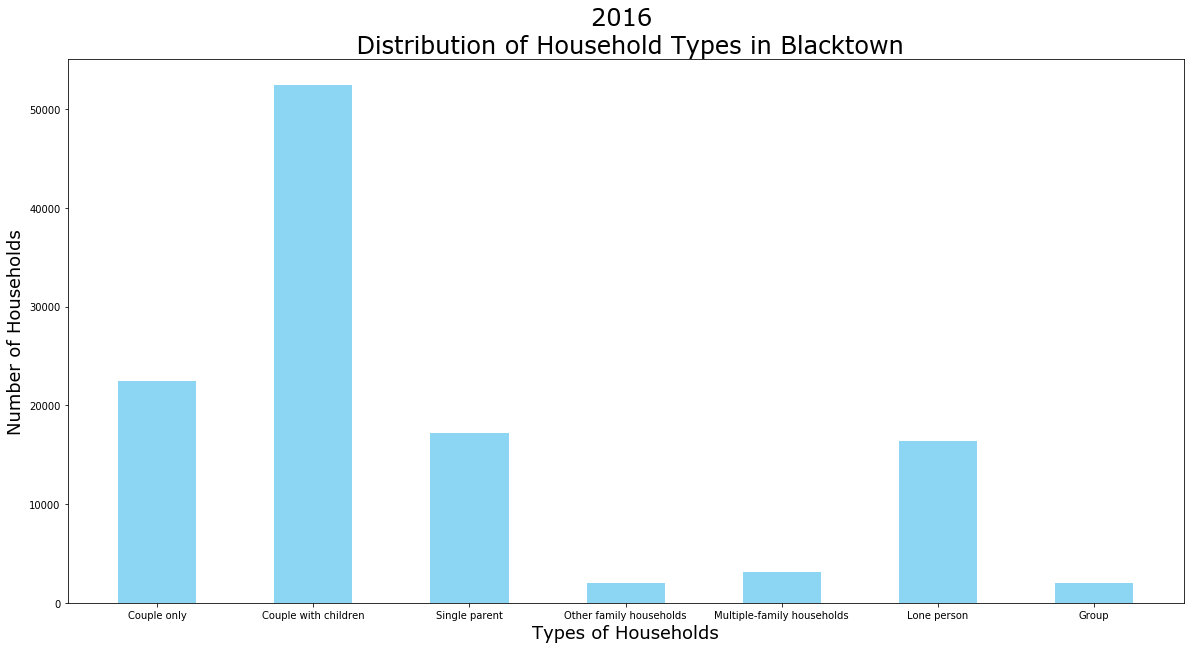

In [245]:
LGA_Comparison('Blacktown')

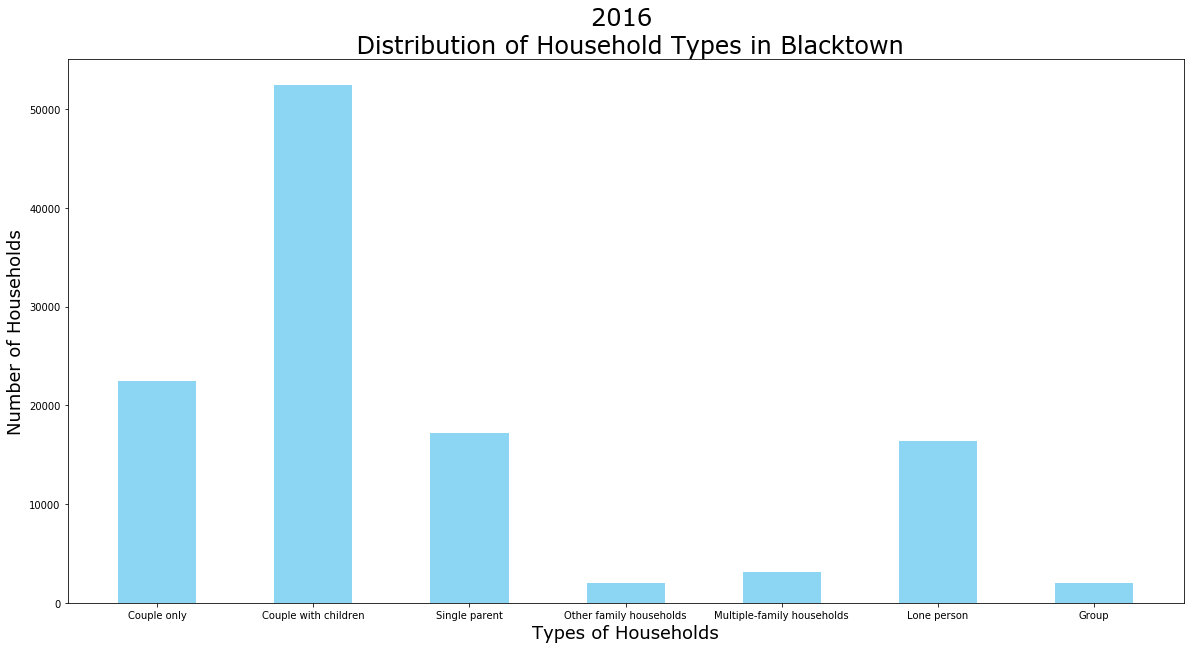

In [244]:
Household_Dist_Bar('Blacktown')

# Linking the Data

Visualising has shown that vehicle travel and family households dominated their respective graphs in a large majority of LGAs. From that observation, we can make hypotheses on likely links and test them through graphical means.  

### Hypothesis Testing

For the testing, I wanted to discover the ratio between the percentage of a type of household in an LGA and the percentage of a mode of transport in the same area.

As for the hypothesis I'll be making, they are:
- The amount of private vehicles driven is proportional to the amount of family households, and vice versa
- The amount of walking only people is proportional to the amount of lone person households

In [200]:
def Mode_PercFinder(LGA_name, MoT):
    '''Finds the percentage of a Mode of Transport (MoT) used in an LGA'''
    Mode_2016v2 = Mode_2016.set_index('LGA_NAME') #set index as LGA so the name can be located
    LGA_data = Mode_2016v2.loc[LGA_name] #locates the LGA inputted
    Mode_type = LGA_data.set_index('MODE_LABEL') #set index as the MoT for easier data extraction
    try:
        Mode_loc = Mode_type['PCT_OF_LGA_WEIGHTED_TRIPS']
        return Mode_loc[MoT] #returns the percentage
    except KeyError:
        return 0 #try except function for when the type of transport does not exist in an LGA
#Mode_PercFinder('Burwood', 'Train')
#Mode_PercFinder('Shoalhaven', 'Train')

In [138]:
def House_PropFinder(LGA_name, household):
    '''Finds the proportion of a type of household over total'''
    household_proj2 = household_proj.set_index('Sydney Metropolitan LGAs') #set index as LGA so the name can be located
    LGA_data2 = household_proj2.loc[fold(LGA_name)] #converts to the value used in the data set
    House_Type = LGA_data2.set_index('Household Type')
    House_loc = House_Type[2016] #Reducing dense code in calculations

    #Calculate the percentage
    return (House_loc[household]/House_loc['Total'])*100

In [217]:
def Ratio_LGA_Bar_graph(household, MoT):
    comp_ratio_list = []
    for i in range(len(LGA_list)): #for loop for every LGA
        house_perc = House_PropFinder(LGA_list[i], household)
        if MoT == 'private': #shortcut for private vehicle proportion
            transport_perc = Mode_PercFinder(LGA_list[i], 'Vehicle Passenger') + Mode_PercFinder(LGA_list[i], 'Vehicle Driver')
            comp_ratio = house_perc/transport_perc #calculating ratio between perc of household over MoT perc
            comp_ratio_list.append(comp_ratio) #appends this ratio into the list in the same order of the LGA listings
        elif MoT == 'public': #shortcut for public transport and walking
            transport_perc = 100 - (Mode_PercFinder(LGA_list[i], 'Vehicle Passenger') + Mode_PercFinder(LGA_list[i], 'Vehicle Driver'))
            comp_ratio = house_perc/transport_perc
            comp_ratio_list.append(comp_ratio)
        else:
            transport_perc = Mode_PercFinder(LGA_list[i], MoT)
            comp_ratio = house_perc/transport_perc
            comp_ratio_list.append(comp_ratio)
    #Plot bar graph
    plt.barh( LGA_list, comp_ratio_list, color=('#8CD6F4'))
    plt.title('2016 \n Ratio of Proportion of {} vs Proportion of {} Transport Travellers in LGAs'.format(household,MoT), tfont, fontsize=24)
    plt.xlabel('Ratio of Proportion of {} vs Proportion of {} Transport Travellers'.format(household, MoT), tfont, fontsize=18)
    plt.ylabel('Local Government Areas (LGA)', tfont, fontsize=18)
    #Finding average of all ratios
    comp_ratio_average =  sum(comp_ratio_list)/len(comp_ratio_list)
    plt.axvline(x=comp_ratio_average, color = 'b', label='Average Observed Ratio')
    plt.axvline(x=1, color ='r', linestyle = ':', label='Expected Ratio for Linearity')
    legend = plt.legend()


In [228]:
def Ratios_Scatter_graph(household, MoT):
    house_perc_list = []
    transport_perc_list = []
    for i in range(len(LGA_list)):
        house_perc = House_PropFinder(LGA_list[i], household)
        house_perc_list.append(house_perc)
        if MoT == 'private':
            transport_perc = Mode_PercFinder(LGA_list[i], 'Vehicle Passenger') + Mode_PercFinder(LGA_list[i], 'Vehicle Driver')
            transport_perc_list.append(transport_perc)
        elif MoT == 'public':
            transport_perc = 100 - (Mode_PercFinder(LGA_list[i], 'Vehicle Passenger') + Mode_PercFinder(LGA_list[i], 'Vehicle Driver'))
            transport_perc_list.append(transport_perc)
        else:
            transport_perc = Mode_PercFinder(LGA_list[i], MoT)
            transport_perc_list.append(transport_perc)
    #Plot scatter graph to observe distribution
    plt.scatter(house_perc_list, transport_perc_list, color=('#66AAD6'))
    plt.title('2016 \n {} vs {} Transport Travellers Scatter Graph'.format(household,MoT), tfont, fontsize=24)
    plt.xlabel('Percentage of {} over the Total Households (%)'.format(household), tfont, fontsize=18)
    plt.ylabel('Percentage of {} Transport Travellers (%)'.format(MoT), tfont, fontsize=18)
    #Plot y=x linear lines for the expected value
    x = list(range(100))
    lline, = plt.plot(x, x, ':r', label='Expected Linear Comparison')
    legend = plt.legend()

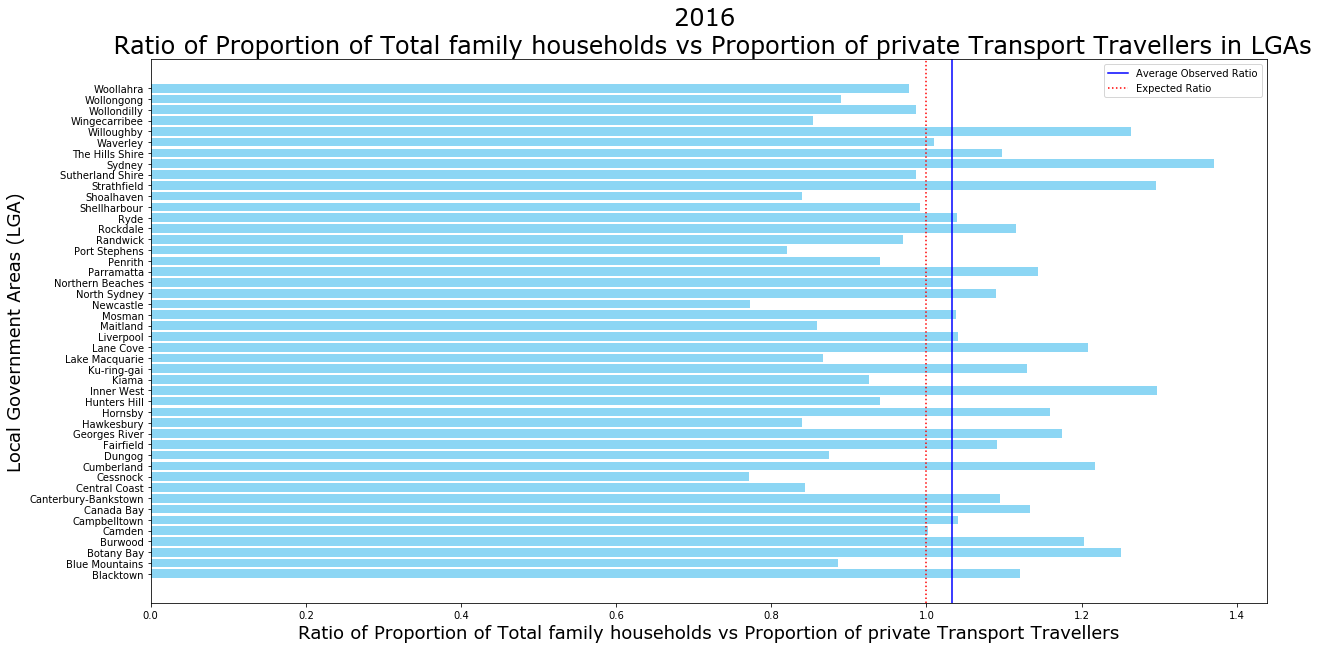

In [212]:
Ratio_LGA_Bar_graph('Total family households', 'private')

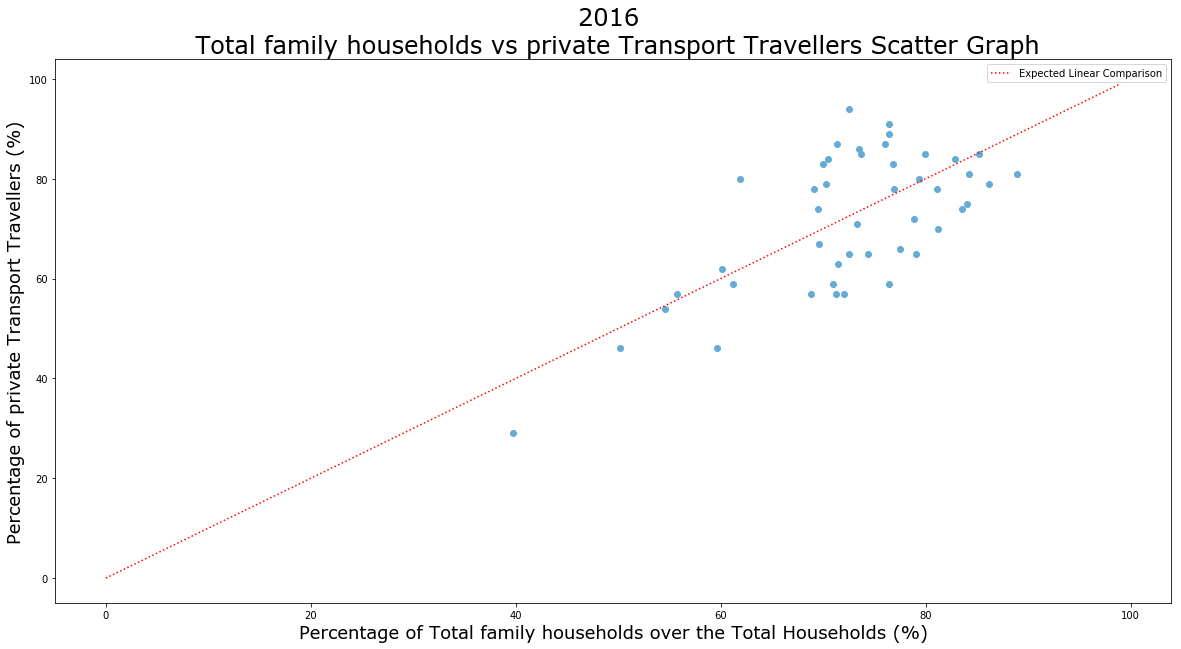

In [215]:
Ratios_Scatter_graph('Total family households', 'private')

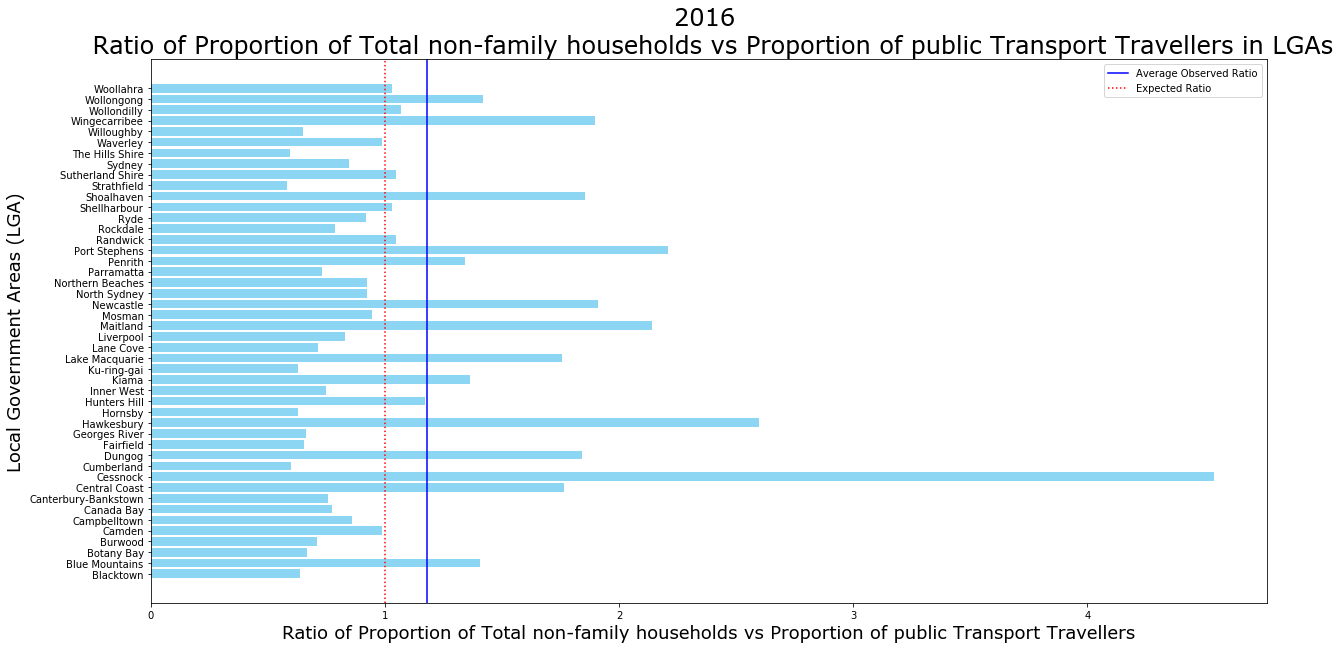

In [213]:
Ratio_LGA_Bar_graph('Total non-family households', 'public')

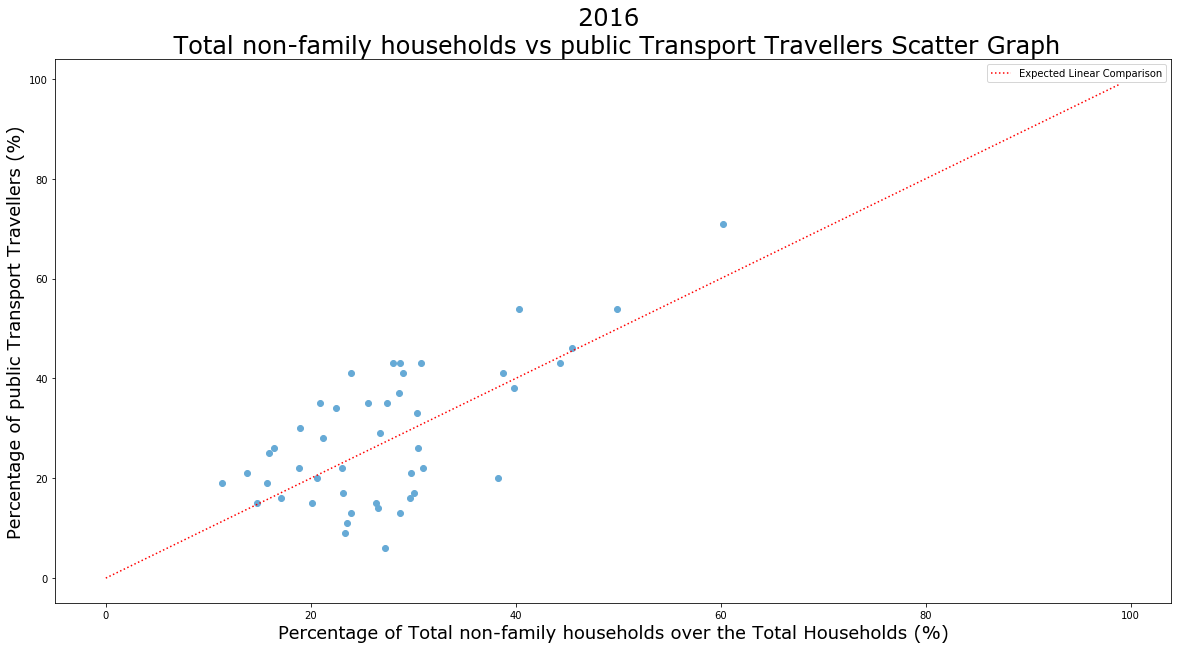

In [238]:
Ratios_Scatter_graph('Total non-family households', 'public')

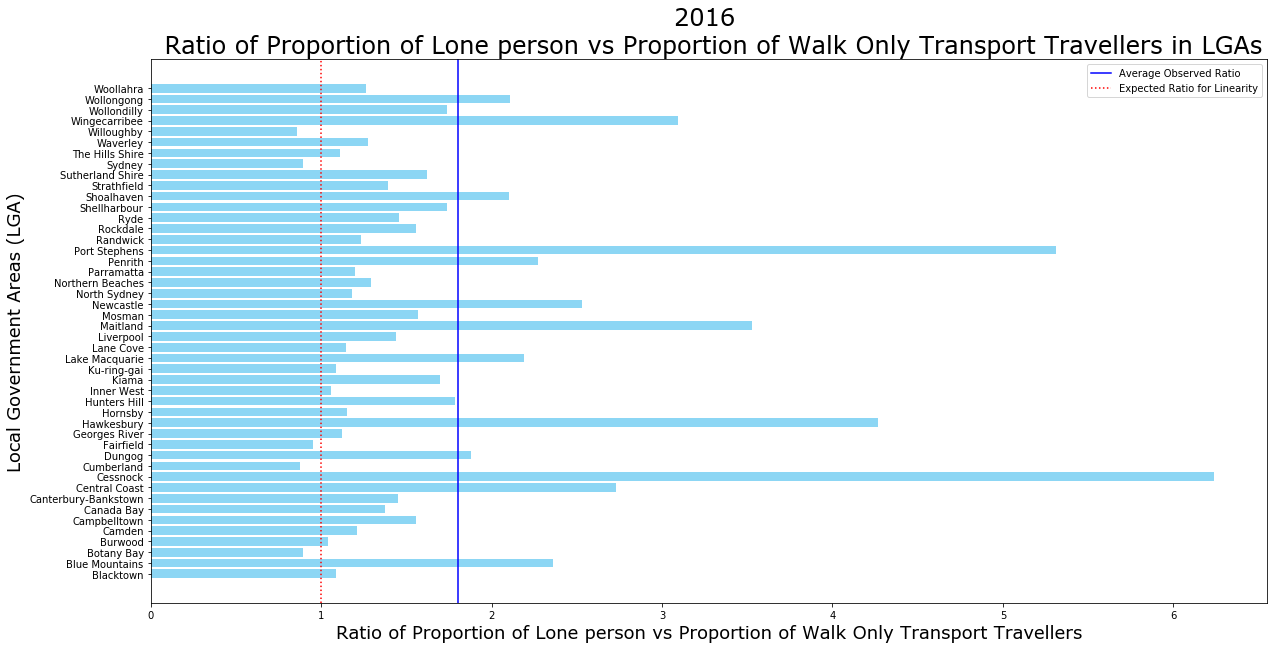

In [231]:
Ratio_LGA_Bar_graph('Lone person', 'Walk Only')

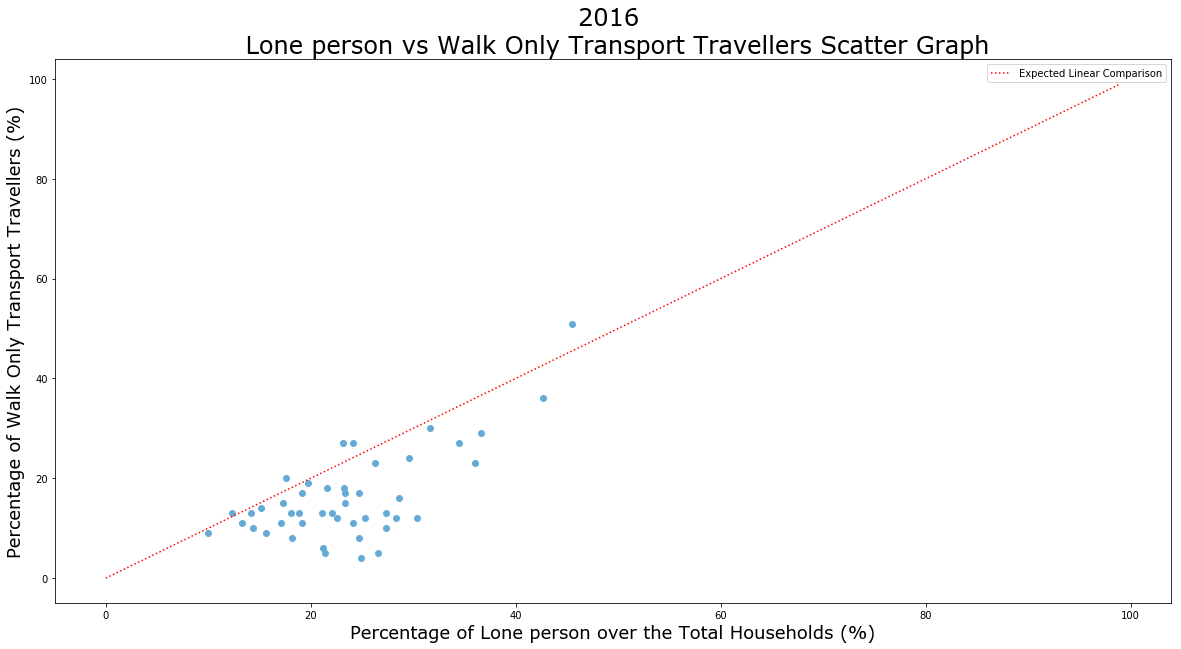

In [232]:
Ratios_Scatter_graph('Lone person', 'Walk Only')

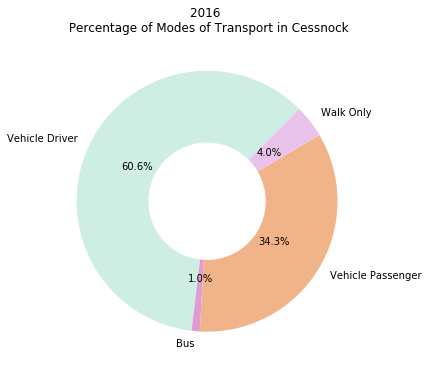

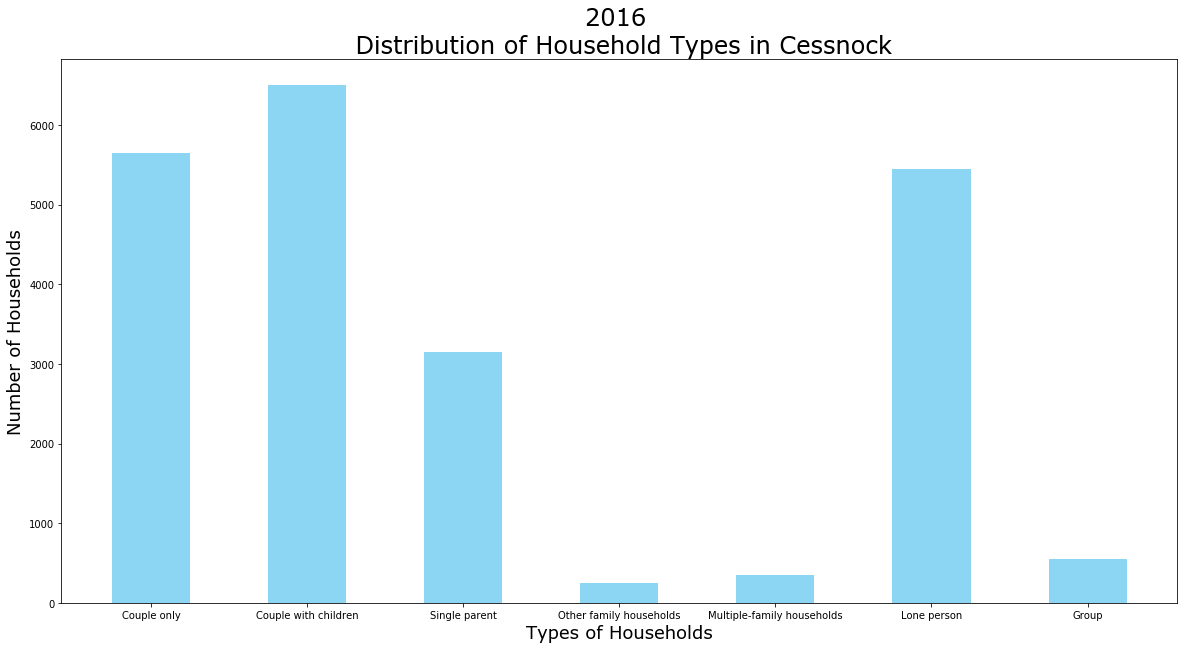

In [233]:
LGA_Comparison('Cessnock')

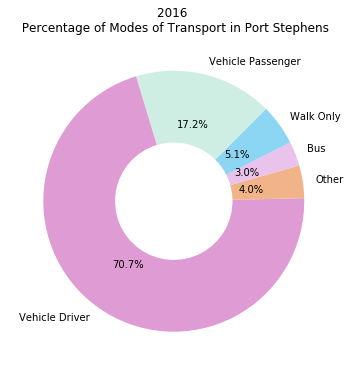

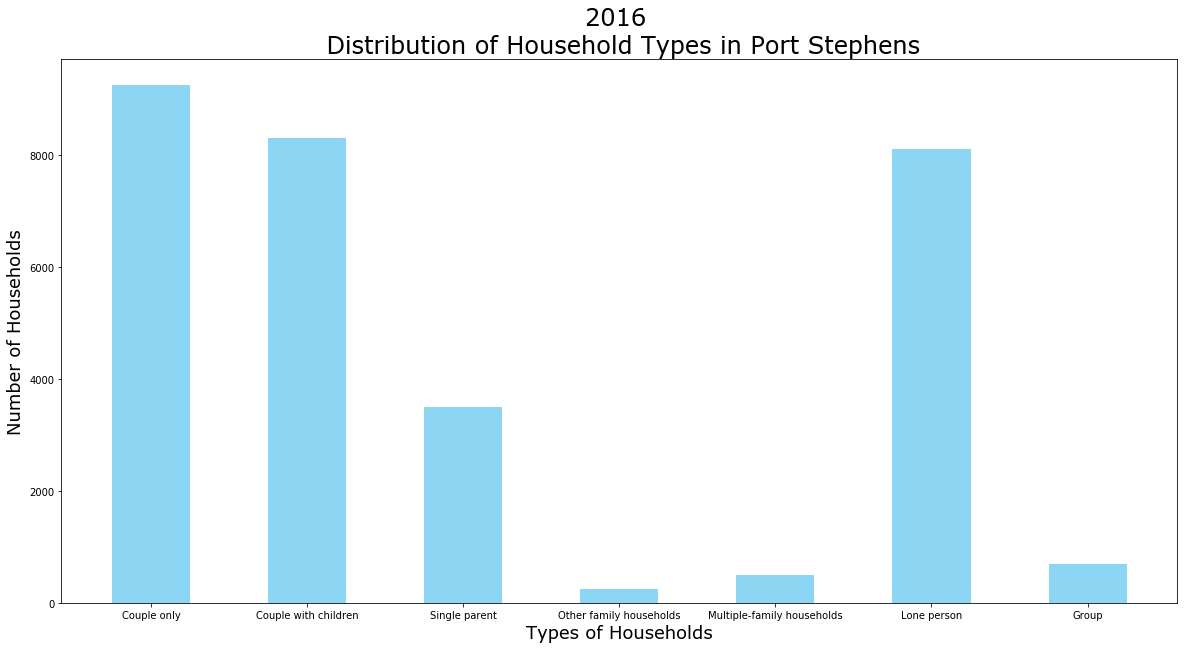

In [234]:
LGA_Comparison('Port Stephens')

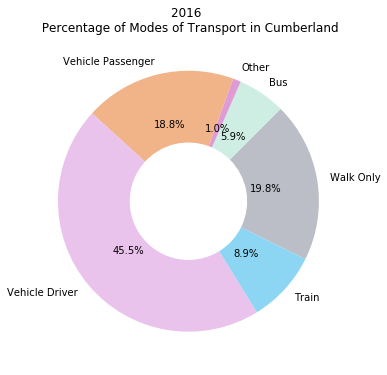

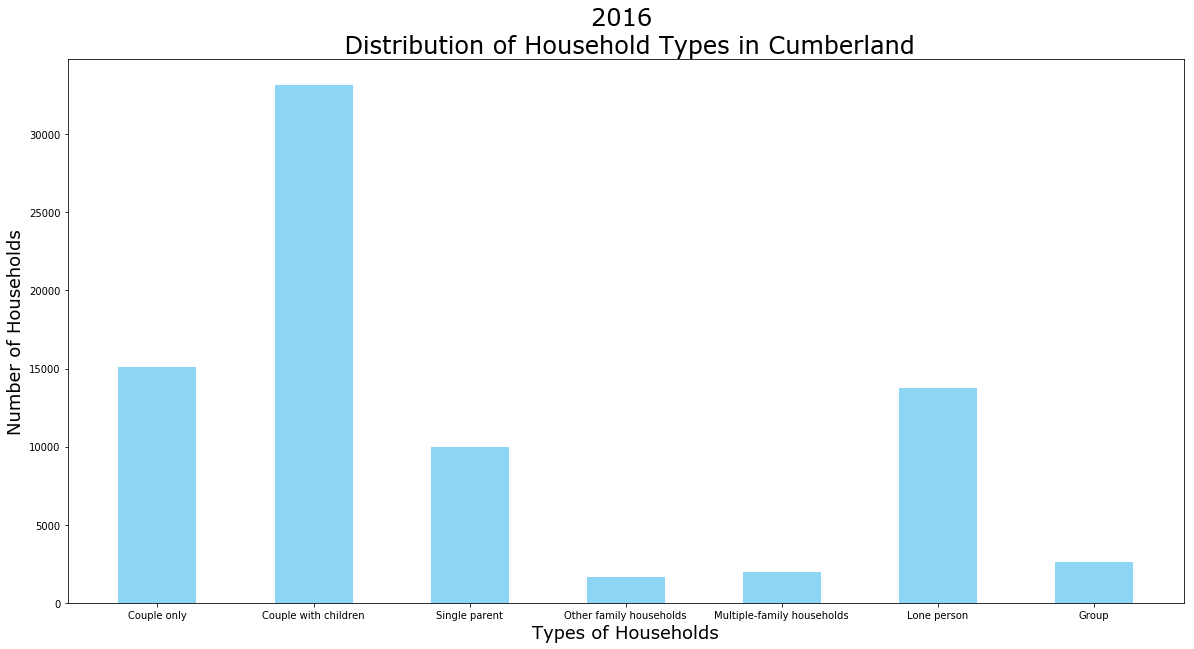

In [236]:
LGA_Comparison('Cumberland')

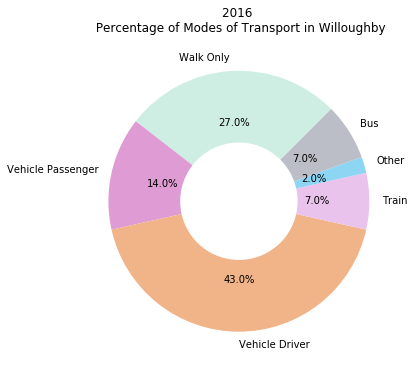

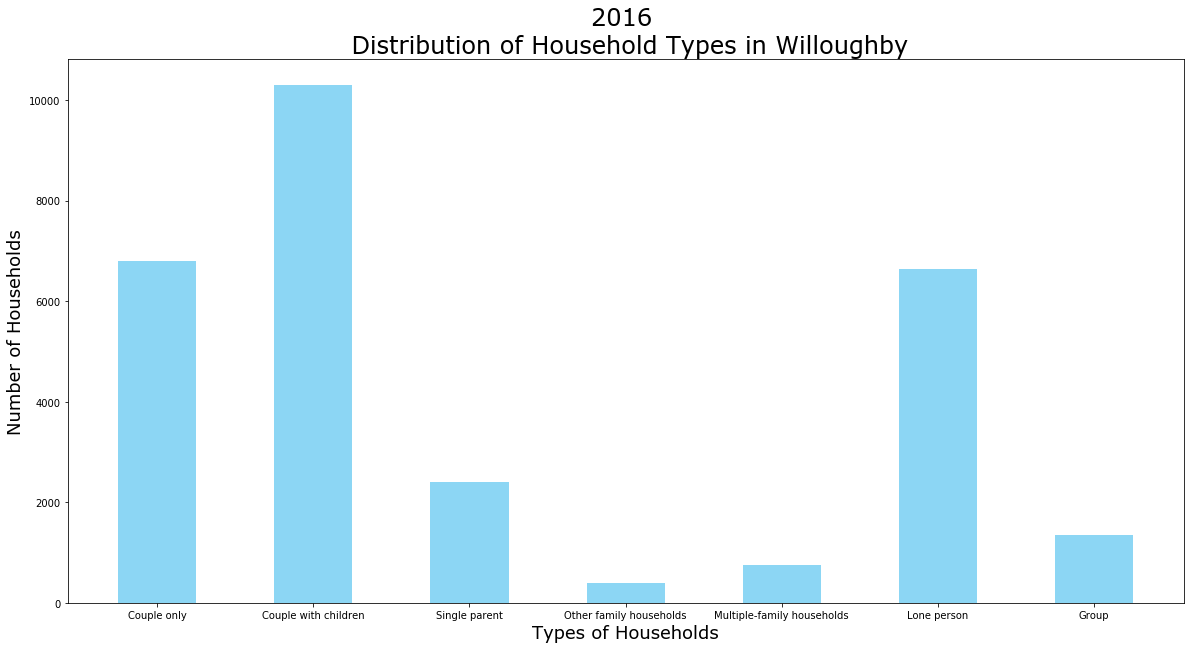

In [239]:
LGA_Comparison('Willoughby')

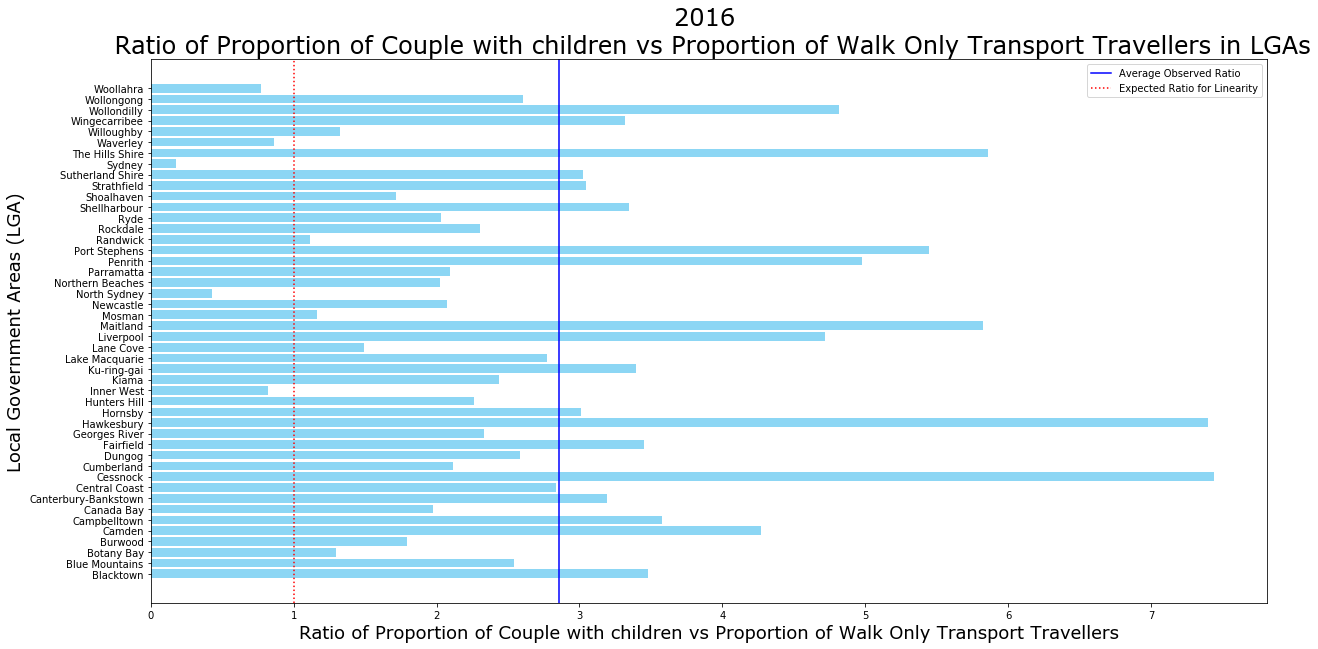

In [237]:
Ratio_LGA_Bar_graph('Couple with children', 'Walk Only')

## Conclusion

The analysis had decent evidence for the hypothesis, mainly that family households is proportional to private vehicles used in travel.
It was also discovered that more rural LGAs such as Cessnock and Port Stephens relied greatly on private vehicles and thus skewed the graph.
Additionally, LGAs near bushland such as Willoughby and Cumberland had a relatively large proportion of citizens who walk only.

Note: Consideration into more factors such as the surrounding environment would have benefitted the analysis